In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Questions

Does the gender affects on the descition to cancle the service?

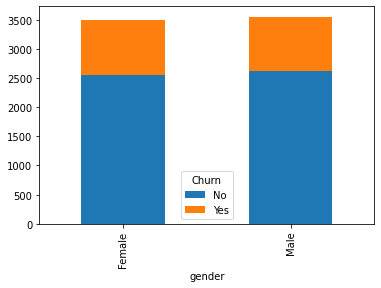

In [6]:
plot = data.groupby(['gender','Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
plot.plot(kind='bar', stacked=True, )

We see no difference between genders when it comes to cancel the service

Senior Citizens tend to cancel more?

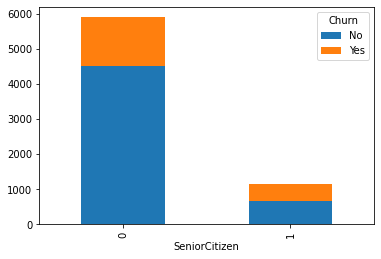

In [7]:
plot = data.groupby(['SeniorCitizen','Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
plot.plot(kind='bar', stacked=True)

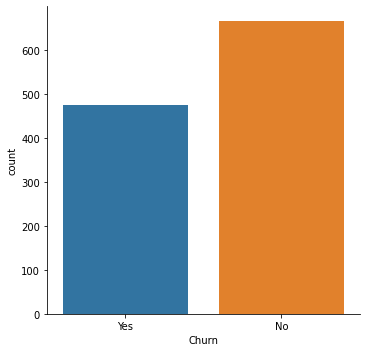

In [8]:
sns.catplot(x='Churn', kind='count',data=data[['SeniorCitizen','Churn']][data.SeniorCitizen == 1])

We can observe that although there are not many Seniors Citizens in the data set, a considerable part of them cancel their contracts. Let's make a deeper analysis here

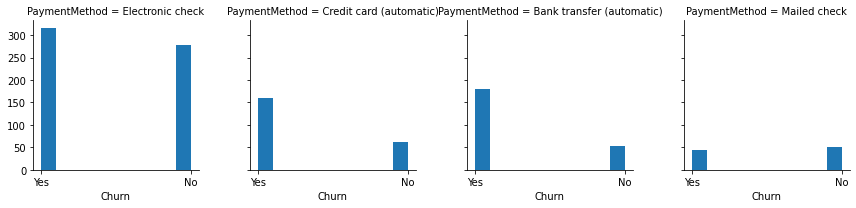

In [9]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='PaymentMethod')
g = g.map(plt.hist, 'Churn')

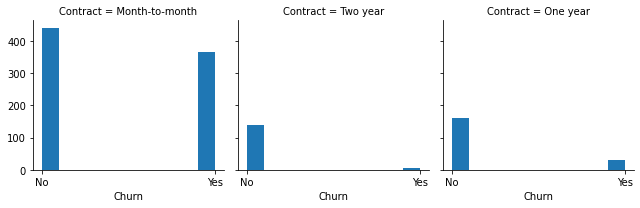

In [10]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='Contract')
g = g.map(plt.hist, 'Churn')

We can already start to think that the feature PaymentMethod and Contract are very powerful to this analysis

Let's see what happend with this two feature but with no Senior Citizens

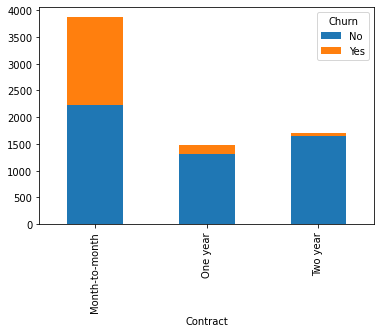

In [11]:
plot = data.groupby(['Contract','Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
plot.plot(kind='bar', stacked=True)

Here is a huge finding, as we can see the most part of the churn is by month-to-month contract customers. This was one of my theories before analyzing the data and came up to be true.

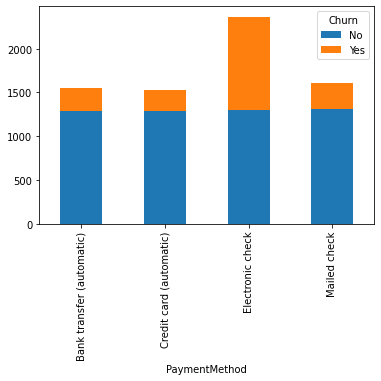

In [12]:
plot = data.groupby(['PaymentMethod','Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
plot.plot(kind='bar', stacked=True)

Another interesting finding here, the electronic check payment method was the one with most considerable churn rate.

In [13]:
rates = pd.DataFrame([], columns=['Method', 'Positive Rate', 'Negative Rate'])

In [14]:
for method in data['PaymentMethod'].value_counts().index.tolist():
    negative_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[0] / data['Churn'].shape[0]
    positive_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[1] / data['Churn'].shape[0]
    rate = {'Method': method, 'Positive Rate': positive_rate, 'Negative Rate': negative_rate}
    rates = rates.append(pd.Series(rate), ignore_index=True)

In [15]:
rates

,Method,Positive Rate,Negative Rate
0,Electronic check,0.152066,0.183729
1,Mailed check,0.043731,0.185148
2,Bank transfer (automatic),0.036632,0.182593
3,Credit card (automatic),0.032941,0.183161


Make a quick look to the positive rates of the other three, significantly lower than Electronic Check

Next we want to analyze the tenure which stands for how long the clients have been actively paying the service

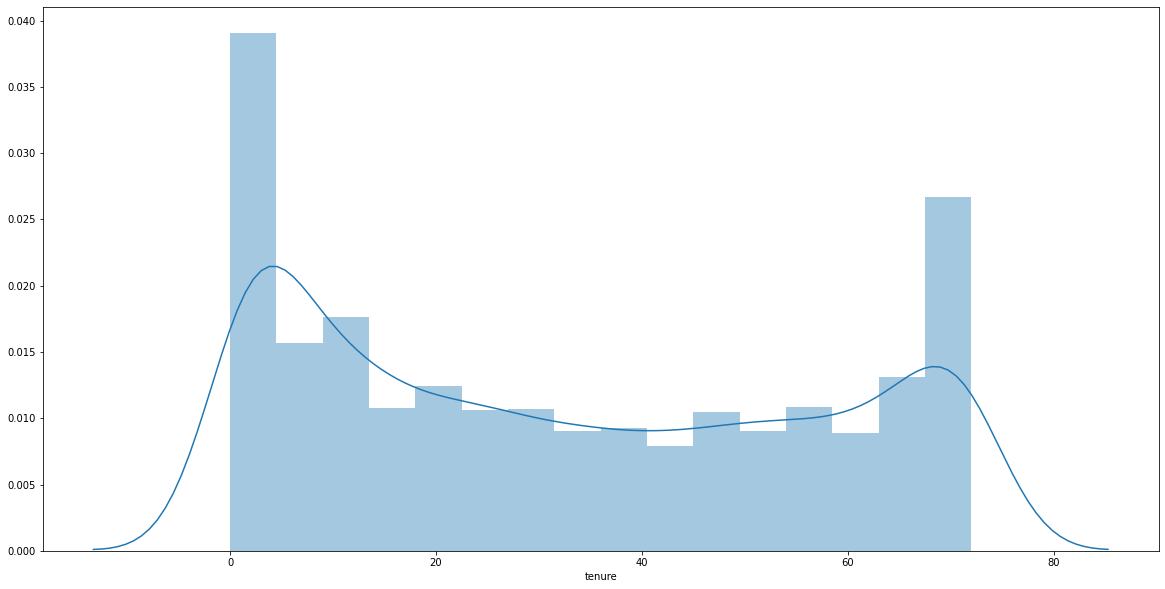

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'])

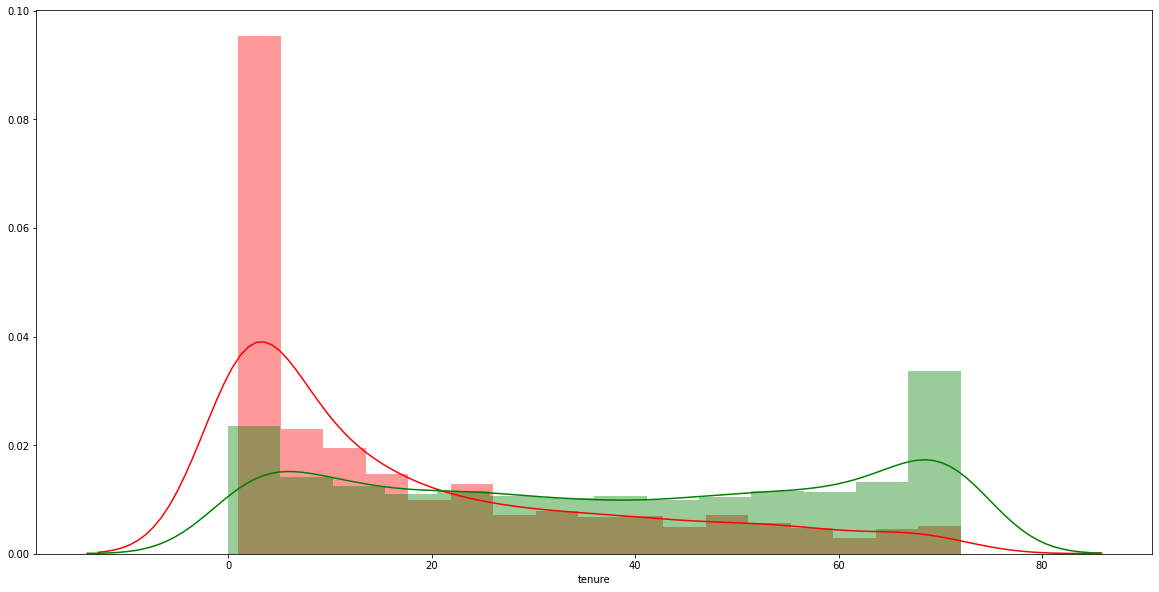

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'][data.Churn == 'Yes'], color='red')
sns.distplot(data['tenure'][data.Churn == 'No'], color='green')

An interesting observation here, the red ones showing the tenure of the clients that churned. And in green the ones that did not. We can see a large amount of clients who churned in the first months and the ones who are clients for more than a year maintaing the service.

Taking a look to the Dependents and Partners of the clients, we can see that people who has not a partner or dependents tend to have a greater churn rate. This could be because of the freedom of not being attached to anyone 

<Figure size 720x720 with 0 Axes>

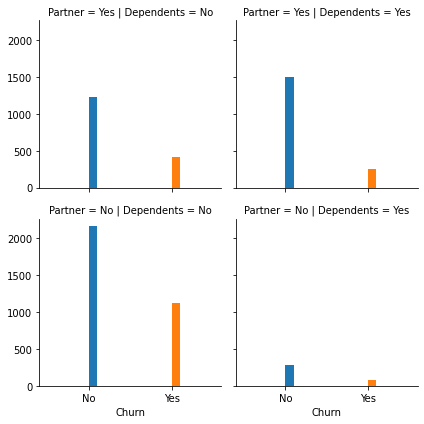

In [18]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data, col='Dependents', row='Partner', hue='Churn')
g = g.map(plt.hist, 'Churn')

Now another theory I had in mind was the fact that if the client is recieving a paper billing instead of a paperless it would have a greater churn rate but the following plot prove me wrong.

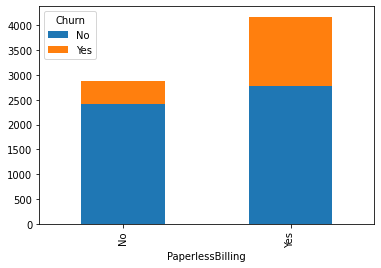

In [19]:
plot = data.groupby(['PaperlessBilling','Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
plot.plot(kind='bar', stacked=True)

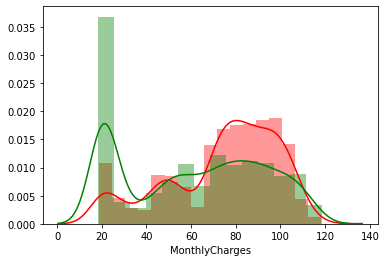

In [20]:
sns.distplot(data['MonthlyCharges'][data.Churn == 'Yes'], color= 'red')
sns.distplot(data['MonthlyCharges'][data.Churn == 'No'], color ='green')

Looking at the monthly charges of the clients we can see that at lower charges, lower the churn rate too but this could be biased because we are not counting how many services the client had contracted.

Now that our basic EDA has ended we are going to create a baseline model for all the features 

We need to map all our data since XGBoost and LightGBM need the features as number input. On the other hand Catboost do not need the features to be numbers.

In [21]:
def map_categorical_ft(data, features):
    map_features = []
    for feature in features:
        mapping = {}
        idx = data[feature].value_counts().index.tolist()
        for index,value in enumerate(idx):
            mapping.update({value: index})  
        data[feature+'_ctg'] = data[feature].map(mapping)
        map_features.append(feature+'_ctg')
    return map_features


In [22]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [23]:
cat_features = map_categorical_ft(data, cat_features)

features = cat_features + ['tenure','MonthlyCharges', 'TotalCharges']

In [24]:
data['TotalCharges'] = (data['tenure'] * data['MonthlyCharges'] ) - data['MonthlyCharges']

In [25]:
data['Churn'] = data['Churn'].map({'Yes': 1,
                                   'No': 0})

## Creating a baseline model

Since this is a classification problem, we are going to train three different algorithms and see the performance of each one. Catboost, XGBoost and LightGBM

### Importing all the models

In [39]:
from catboost import CatBoostClassifier
from catboost import Pool
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data['Churn'], 
                                                        test_size=0.2)

clfs = [CatBoostClassifier(task_type = 'GPU', devices = '0:1'),
          xgb.XGBClassifier(),
          lgb.LGBMClassifier(),
          RandomForestClassifier()
         ]

for cls in clfs:
    cls.fit(X_train, y_train)
    

Learning rate set to 0.030653
0:	learn: 0.6711582	total: 24.5ms	remaining: 24.5s
1:	learn: 0.6511318	total: 50.2ms	remaining: 25.1s
2:	learn: 0.6359737	total: 62.1ms	remaining: 20.6s
3:	learn: 0.6191774	total: 87.6ms	remaining: 21.8s
4:	learn: 0.6036299	total: 115ms	remaining: 22.8s
5:	learn: 0.5895493	total: 144ms	remaining: 23.9s
6:	learn: 0.5768084	total: 165ms	remaining: 23.4s
7:	learn: 0.5653268	total: 191ms	remaining: 23.7s
8:	learn: 0.5545648	total: 217ms	remaining: 23.9s
9:	learn: 0.5443792	total: 241ms	remaining: 23.9s
10:	learn: 0.5351494	total: 263ms	remaining: 23.7s
11:	learn: 0.5266980	total: 286ms	remaining: 23.5s
12:	learn: 0.5193364	total: 302ms	remaining: 22.9s
13:	learn: 0.5123643	total: 323ms	remaining: 22.8s
14:	learn: 0.5070480	total: 333ms	remaining: 21.9s
15:	learn: 0.5010774	total: 357ms	remaining: 22s
16:	learn: 0.4947813	total: 380ms	remaining: 22s
17:	learn: 0.4890590	total: 402ms	remaining: 21.9s
18:	learn: 0.4847500	total: 423ms	remaining: 21.9s
19:	learn: 

171:	learn: 0.3923206	total: 3.52s	remaining: 17s
172:	learn: 0.3922808	total: 3.54s	remaining: 16.9s
173:	learn: 0.3922393	total: 3.55s	remaining: 16.9s
174:	learn: 0.3922037	total: 3.57s	remaining: 16.8s
175:	learn: 0.3920630	total: 3.59s	remaining: 16.8s
176:	learn: 0.3920155	total: 3.61s	remaining: 16.8s
177:	learn: 0.3918827	total: 3.63s	remaining: 16.8s
178:	learn: 0.3918707	total: 3.64s	remaining: 16.7s
179:	learn: 0.3918288	total: 3.66s	remaining: 16.7s
180:	learn: 0.3917369	total: 3.68s	remaining: 16.7s
181:	learn: 0.3916907	total: 3.7s	remaining: 16.6s
182:	learn: 0.3916905	total: 3.71s	remaining: 16.6s
183:	learn: 0.3916506	total: 3.72s	remaining: 16.5s
184:	learn: 0.3916373	total: 3.73s	remaining: 16.4s
185:	learn: 0.3915599	total: 3.75s	remaining: 16.4s
186:	learn: 0.3915302	total: 3.76s	remaining: 16.3s
187:	learn: 0.3915172	total: 3.76s	remaining: 16.3s
188:	learn: 0.3915150	total: 3.77s	remaining: 16.2s
189:	learn: 0.3914387	total: 3.78s	remaining: 16.1s
190:	learn: 0.3

334:	learn: 0.3837247	total: 6.22s	remaining: 12.3s
335:	learn: 0.3837230	total: 6.23s	remaining: 12.3s
336:	learn: 0.3837212	total: 6.24s	remaining: 12.3s
337:	learn: 0.3836357	total: 6.26s	remaining: 12.3s
338:	learn: 0.3836013	total: 6.28s	remaining: 12.2s
339:	learn: 0.3835997	total: 6.29s	remaining: 12.2s
340:	learn: 0.3835056	total: 6.31s	remaining: 12.2s
341:	learn: 0.3834721	total: 6.33s	remaining: 12.2s
342:	learn: 0.3834073	total: 6.35s	remaining: 12.2s
343:	learn: 0.3833988	total: 6.36s	remaining: 12.1s
344:	learn: 0.3833404	total: 6.38s	remaining: 12.1s
345:	learn: 0.3832392	total: 6.4s	remaining: 12.1s
346:	learn: 0.3830436	total: 6.42s	remaining: 12.1s
347:	learn: 0.3830256	total: 6.43s	remaining: 12.1s
348:	learn: 0.3830255	total: 6.44s	remaining: 12s
349:	learn: 0.3830254	total: 6.45s	remaining: 12s
350:	learn: 0.3829709	total: 6.47s	remaining: 12s
351:	learn: 0.3829705	total: 6.48s	remaining: 11.9s
352:	learn: 0.3828884	total: 6.5s	remaining: 11.9s
353:	learn: 0.382780

503:	learn: 0.3777173	total: 8.95s	remaining: 8.81s
504:	learn: 0.3777170	total: 8.96s	remaining: 8.78s
505:	learn: 0.3776775	total: 8.98s	remaining: 8.77s
506:	learn: 0.3776768	total: 8.99s	remaining: 8.74s
507:	learn: 0.3776764	total: 9s	remaining: 8.72s
508:	learn: 0.3776755	total: 9.01s	remaining: 8.69s
509:	learn: 0.3776485	total: 9.03s	remaining: 8.68s
510:	learn: 0.3776478	total: 9.04s	remaining: 8.65s
511:	learn: 0.3776317	total: 9.06s	remaining: 8.64s
512:	learn: 0.3776316	total: 9.07s	remaining: 8.61s
513:	learn: 0.3776299	total: 9.08s	remaining: 8.59s
514:	learn: 0.3775609	total: 9.1s	remaining: 8.57s
515:	learn: 0.3775604	total: 9.11s	remaining: 8.55s
516:	learn: 0.3775321	total: 9.13s	remaining: 8.53s
517:	learn: 0.3775318	total: 9.14s	remaining: 8.51s
518:	learn: 0.3775314	total: 9.15s	remaining: 8.48s
519:	learn: 0.3774751	total: 9.18s	remaining: 8.47s
520:	learn: 0.3774619	total: 9.21s	remaining: 8.46s
521:	learn: 0.3774175	total: 9.23s	remaining: 8.46s
522:	learn: 0.37

664:	learn: 0.3743714	total: 11.7s	remaining: 5.9s
665:	learn: 0.3743467	total: 11.7s	remaining: 5.88s
666:	learn: 0.3743450	total: 11.7s	remaining: 5.86s
667:	learn: 0.3743435	total: 11.7s	remaining: 5.84s
668:	learn: 0.3743425	total: 11.8s	remaining: 5.82s
669:	learn: 0.3743399	total: 11.8s	remaining: 5.8s
670:	learn: 0.3743390	total: 11.8s	remaining: 5.78s
671:	learn: 0.3742612	total: 11.8s	remaining: 5.76s
672:	learn: 0.3741952	total: 11.8s	remaining: 5.75s
673:	learn: 0.3741948	total: 11.8s	remaining: 5.72s
674:	learn: 0.3740335	total: 11.9s	remaining: 5.71s
675:	learn: 0.3740333	total: 11.9s	remaining: 5.69s
676:	learn: 0.3740330	total: 11.9s	remaining: 5.67s
677:	learn: 0.3739622	total: 11.9s	remaining: 5.67s
678:	learn: 0.3739621	total: 11.9s	remaining: 5.65s
679:	learn: 0.3739619	total: 12s	remaining: 5.63s
680:	learn: 0.3739612	total: 12s	remaining: 5.61s
681:	learn: 0.3739612	total: 12s	remaining: 5.59s
682:	learn: 0.3739610	total: 12s	remaining: 5.57s
683:	learn: 0.3739603	

834:	learn: 0.3709493	total: 14.7s	remaining: 2.9s
835:	learn: 0.3709493	total: 14.7s	remaining: 2.88s
836:	learn: 0.3709447	total: 14.7s	remaining: 2.86s
837:	learn: 0.3709446	total: 14.7s	remaining: 2.84s
838:	learn: 0.3708438	total: 14.7s	remaining: 2.82s
839:	learn: 0.3708323	total: 14.7s	remaining: 2.81s
840:	learn: 0.3708315	total: 14.8s	remaining: 2.79s
841:	learn: 0.3708315	total: 14.8s	remaining: 2.77s
842:	learn: 0.3706805	total: 14.8s	remaining: 2.75s
843:	learn: 0.3706805	total: 14.8s	remaining: 2.73s
844:	learn: 0.3706805	total: 14.8s	remaining: 2.71s
845:	learn: 0.3706216	total: 14.8s	remaining: 2.7s
846:	learn: 0.3706215	total: 14.8s	remaining: 2.68s
847:	learn: 0.3706211	total: 14.8s	remaining: 2.66s
848:	learn: 0.3706209	total: 14.8s	remaining: 2.64s
849:	learn: 0.3706092	total: 14.9s	remaining: 2.62s
850:	learn: 0.3706092	total: 14.9s	remaining: 2.6s
851:	learn: 0.3706091	total: 14.9s	remaining: 2.58s
852:	learn: 0.3706089	total: 14.9s	remaining: 2.57s
853:	learn: 0.3

In [45]:
clfs[4]

IndexError: list index out of range

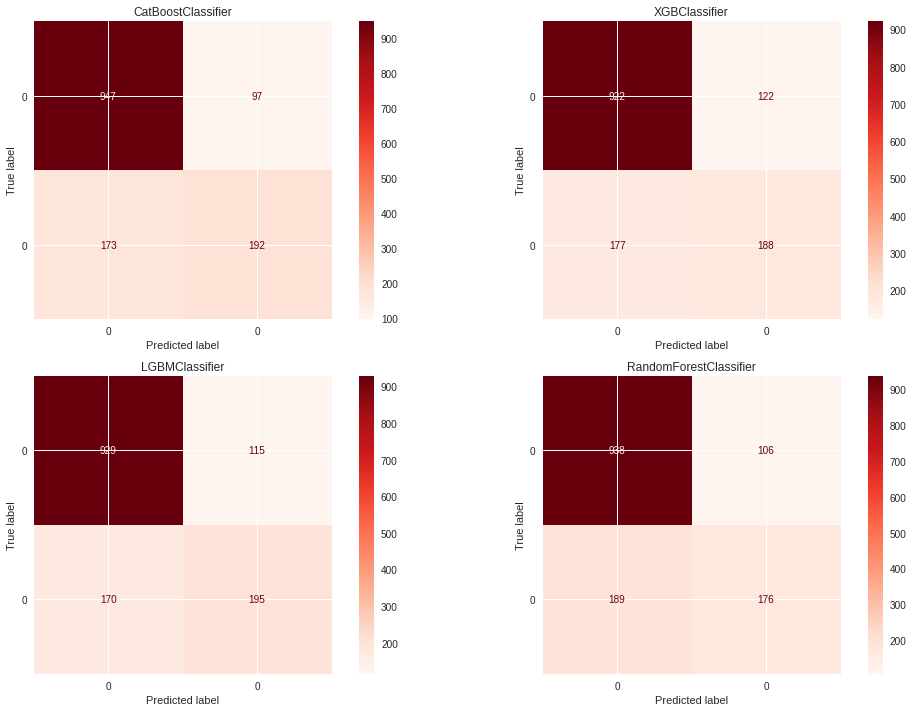

In [46]:
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(clfs, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Reds',
                         display_labels=data.Churn)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, auc,roc_auc_score, recall_score, log_loss, roc_curve, f1_score,precision_score
metrics = pd.DataFrame([], columns=['Name','Accuracy','AUC Score','Precision','Recall','F1-Score','Logloss'])

for cls in clfs:
    stats = {}
    prediction = cls.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
    stats.update({'Accuracy': accuracy_score(y_test, prediction),
                  'Name': type(cls).__name__ ,
                 'Recall' : recall_score(y_test, prediction),
                 'F1-Score': f1_score(y_test, prediction),
                 'AUC Score': roc_auc_score(y_test, prediction),
                 'Logloss': log_loss(y_test,prediction),
                 'Precision': precision_score(y_test,prediction)})
    metrics = metrics.append(stats, ignore_index=True)
        

In [49]:
metrics

,Name,Accuracy,AUC Score,Precision,Recall,F1-Score,Logloss
0,CatBoostClassifier,0.808375,0.716558,0.664360,0.526027,0.587156,6.618557
1,XGBClassifier,0.787793,0.699105,0.606452,0.515068,0.557037,7.329448
2,LGBMClassifier,0.797729,0.712047,0.629032,0.534247,0.577778,6.986262
3,RandomForestClassifier,0.790632,0.690330,0.624113,0.482192,0.544049,7.231387


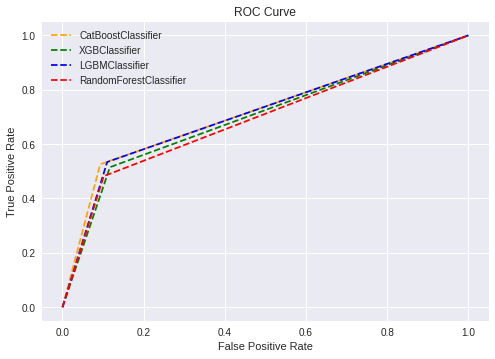

In [50]:
colors = ['orange','green','blue','red']
plt.style.use('seaborn')
for idx, cls in enumerate(clfs):
    prediction = cls.predict(X_test)
    fpr, tpr , threshold = roc_curve(y_test, prediction)
    plt.plot(fpr, tpr, linestyle='--', color=colors[idx],
                 label=type(cls).__name__)
    
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

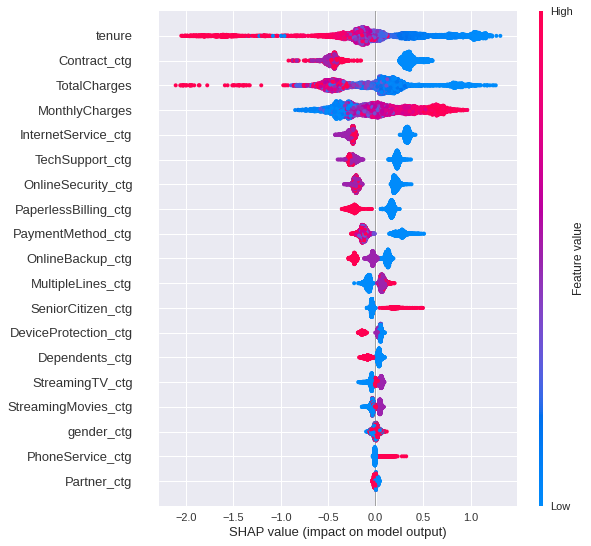

In [51]:
import shap


shap_values = clfs[0].get_feature_importance(Pool(X_train,y_train), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X_train)

In [52]:
features = [x for x in features if x not in ['StreamingTV_ctg','StreamingMovies_ctg','gender_ctg','MultipleLines_ctg','Device_Protection_ctg','OnlineBackup_ctg'] ]

In [56]:
features

['SeniorCitizen_ctg',
 'Partner_ctg',
 'Dependents_ctg',
 'PhoneService_ctg',
 'InternetService_ctg',
 'OnlineSecurity_ctg',
 'DeviceProtection_ctg',
 'TechSupport_ctg',
 'Contract_ctg',
 'PaperlessBilling_ctg',
 'PaymentMethod_ctg',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [53]:
cb_clf = CatBoostClassifier(task_type = 'GPU',
                            learning_rate=0.01,
                            devices = '0:1',
                            eval_metric='AUC',
                            custom_metric='Logloss',
                            iterations=5000,
                            depth=3,
                            random_seed = 1,
                            od_type='Iter',
                            od_wait=500
                            )
training_pool = Pool(X_train[features], y_train)

cb_clf.fit(training_pool, eval_set=(X_test[features],y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8010771	test: 0.8044888	best: 0.8044888 (0)	total: 19.7ms	remaining: 1m 38s
1:	learn: 0.8260101	test: 0.8283249	best: 0.8283249 (1)	total: 31.3ms	remaining: 1m 18s
2:	learn: 0.8298402	test: 0.8324358	best: 0.8324358 (2)	total: 42.2ms	remaining: 1m 10s
3:	learn: 0.8324133	test: 0.8324017	best: 0.8324358 (2)	total: 53.3ms	remaining: 1m 6s
4:	learn: 0.8344895	test: 0.8316341	best: 0.8324358 (2)	total: 65.4ms	remaining: 1m 5s
5:	learn: 0.8344214	test: 0.8326760	best: 0.8326760 (5)	total: 76.3ms	remaining: 1m 3s
6:	learn: 0.8340533	test: 0.8324949	best: 0.8326760 (5)	total: 89.6ms	remaining: 1m 3s
7:	learn: 0.8352910	test: 0.8334475	best: 0.8334475 (7)	total: 101ms	remaining: 1m 3s
8:	learn: 0.8341404	test: 0.8326235	best: 0.8334475 (7)	total: 113ms	remaining: 1m 2s
9:	learn: 0.8361154	test: 0.8355325	best: 0.8355325 (9)	total: 130ms	remaining: 1m 4s
10:	learn: 0.8361860	test: 0.8360980	best: 0.8360980 (10)	total: 142ms	remaining: 1m 4s
11:	learn: 0.8360183	test: 0.8356230	best:

101:	learn: 0.8455018	test: 0.8441519	best: 0.8444143 (97)	total: 1.17s	remaining: 56.4s
102:	learn: 0.8455290	test: 0.8440600	best: 0.8444143 (97)	total: 1.19s	remaining: 56.4s
103:	learn: 0.8456003	test: 0.8439130	best: 0.8444143 (97)	total: 1.2s	remaining: 56.4s
104:	learn: 0.8455971	test: 0.8439786	best: 0.8444143 (97)	total: 1.21s	remaining: 56.3s
105:	learn: 0.8456301	test: 0.8439708	best: 0.8444143 (97)	total: 1.22s	remaining: 56.2s
106:	learn: 0.8456831	test: 0.8439550	best: 0.8444143 (97)	total: 1.23s	remaining: 56.3s
107:	learn: 0.8456221	test: 0.8440180	best: 0.8444143 (97)	total: 1.24s	remaining: 56.2s
108:	learn: 0.8456382	test: 0.8440941	best: 0.8444143 (97)	total: 1.25s	remaining: 56.1s
109:	learn: 0.8456605	test: 0.8441282	best: 0.8444143 (97)	total: 1.26s	remaining: 56s
110:	learn: 0.8456706	test: 0.8441335	best: 0.8444143 (97)	total: 1.27s	remaining: 55.9s
111:	learn: 0.8457499	test: 0.8443211	best: 0.8444143 (97)	total: 1.28s	remaining: 55.8s
112:	learn: 0.8457216	te

197:	learn: 0.8481834	test: 0.8453472	best: 0.8453774 (183)	total: 2.18s	remaining: 52.9s
198:	learn: 0.8482172	test: 0.8453524	best: 0.8453774 (183)	total: 2.19s	remaining: 52.8s
199:	learn: 0.8482729	test: 0.8454600	best: 0.8454600 (199)	total: 2.2s	remaining: 52.8s
200:	learn: 0.8483581	test: 0.8455414	best: 0.8455414 (200)	total: 2.21s	remaining: 52.8s
201:	learn: 0.8484025	test: 0.8455834	best: 0.8455834 (201)	total: 2.22s	remaining: 52.7s
202:	learn: 0.8484651	test: 0.8456385	best: 0.8456385 (202)	total: 2.23s	remaining: 52.7s
203:	learn: 0.8484366	test: 0.8456175	best: 0.8456385 (202)	total: 2.24s	remaining: 52.7s
204:	learn: 0.8484778	test: 0.8456726	best: 0.8456726 (204)	total: 2.25s	remaining: 52.7s
205:	learn: 0.8484753	test: 0.8456464	best: 0.8456726 (204)	total: 2.26s	remaining: 52.6s
206:	learn: 0.8485020	test: 0.8457330	best: 0.8457330 (206)	total: 2.27s	remaining: 52.6s
207:	learn: 0.8485611	test: 0.8457960	best: 0.8457960 (207)	total: 2.28s	remaining: 52.6s
208:	learn:

295:	learn: 0.8506550	test: 0.8474952	best: 0.8474952 (295)	total: 3.19s	remaining: 50.7s
296:	learn: 0.8506687	test: 0.8475004	best: 0.8475004 (296)	total: 3.2s	remaining: 50.7s
297:	learn: 0.8506989	test: 0.8474820	best: 0.8475004 (296)	total: 3.22s	remaining: 50.8s
298:	learn: 0.8507094	test: 0.8475240	best: 0.8475240 (298)	total: 3.23s	remaining: 50.8s
299:	learn: 0.8507217	test: 0.8474833	best: 0.8475240 (298)	total: 3.24s	remaining: 50.8s
300:	learn: 0.8507562	test: 0.8475227	best: 0.8475240 (298)	total: 3.25s	remaining: 50.8s
301:	learn: 0.8508133	test: 0.8475778	best: 0.8475778 (301)	total: 3.26s	remaining: 50.8s
302:	learn: 0.8508415	test: 0.8476146	best: 0.8476146 (302)	total: 3.27s	remaining: 50.7s
303:	learn: 0.8508566	test: 0.8476329	best: 0.8476329 (303)	total: 3.28s	remaining: 50.7s
304:	learn: 0.8508574	test: 0.8476146	best: 0.8476329 (303)	total: 3.29s	remaining: 50.7s
305:	learn: 0.8508954	test: 0.8476329	best: 0.8476329 (303)	total: 3.3s	remaining: 50.6s
306:	learn: 

392:	learn: 0.8522663	test: 0.8481604	best: 0.8481604 (392)	total: 4.2s	remaining: 49.2s
393:	learn: 0.8522701	test: 0.8481735	best: 0.8481735 (393)	total: 4.22s	remaining: 49.3s
394:	learn: 0.8523035	test: 0.8481840	best: 0.8481840 (394)	total: 4.23s	remaining: 49.3s
395:	learn: 0.8523050	test: 0.8482155	best: 0.8482155 (395)	total: 4.25s	remaining: 49.4s
396:	learn: 0.8523111	test: 0.8481551	best: 0.8482155 (395)	total: 4.27s	remaining: 49.5s
397:	learn: 0.8523219	test: 0.8481604	best: 0.8482155 (395)	total: 4.28s	remaining: 49.5s
398:	learn: 0.8523346	test: 0.8482050	best: 0.8482155 (395)	total: 4.29s	remaining: 49.5s
399:	learn: 0.8523408	test: 0.8482129	best: 0.8482155 (395)	total: 4.31s	remaining: 49.6s
400:	learn: 0.8523328	test: 0.8482102	best: 0.8482155 (395)	total: 4.32s	remaining: 49.6s
401:	learn: 0.8523463	test: 0.8482102	best: 0.8482155 (395)	total: 4.33s	remaining: 49.6s
402:	learn: 0.8523492	test: 0.8482181	best: 0.8482181 (402)	total: 4.35s	remaining: 49.6s
403:	learn:

494:	learn: 0.8534720	test: 0.8488165	best: 0.8488165 (494)	total: 5.43s	remaining: 49.4s
495:	learn: 0.8534817	test: 0.8488086	best: 0.8488165 (494)	total: 5.44s	remaining: 49.4s
496:	learn: 0.8535155	test: 0.8487902	best: 0.8488165 (494)	total: 5.46s	remaining: 49.4s
497:	learn: 0.8535203	test: 0.8487771	best: 0.8488165 (494)	total: 5.47s	remaining: 49.4s
498:	learn: 0.8535250	test: 0.8488033	best: 0.8488165 (494)	total: 5.48s	remaining: 49.4s
499:	learn: 0.8535441	test: 0.8488165	best: 0.8488165 (494)	total: 5.49s	remaining: 49.4s
500:	learn: 0.8535781	test: 0.8488217	best: 0.8488217 (500)	total: 5.5s	remaining: 49.4s
501:	learn: 0.8535858	test: 0.8488269	best: 0.8488269 (501)	total: 5.51s	remaining: 49.4s
502:	learn: 0.8536027	test: 0.8487955	best: 0.8488269 (501)	total: 5.52s	remaining: 49.4s
503:	learn: 0.8536222	test: 0.8488296	best: 0.8488296 (503)	total: 5.54s	remaining: 49.4s
504:	learn: 0.8536332	test: 0.8488506	best: 0.8488506 (504)	total: 5.54s	remaining: 49.4s
505:	learn:

598:	learn: 0.8545314	test: 0.8490054	best: 0.8490448 (592)	total: 6.63s	remaining: 48.7s
599:	learn: 0.8545441	test: 0.8490343	best: 0.8490448 (592)	total: 6.64s	remaining: 48.7s
600:	learn: 0.8545502	test: 0.8489949	best: 0.8490448 (592)	total: 6.65s	remaining: 48.7s
601:	learn: 0.8545569	test: 0.8489923	best: 0.8490448 (592)	total: 6.66s	remaining: 48.7s
602:	learn: 0.8545614	test: 0.8489949	best: 0.8490448 (592)	total: 6.67s	remaining: 48.7s
603:	learn: 0.8545686	test: 0.8489975	best: 0.8490448 (592)	total: 6.69s	remaining: 48.7s
604:	learn: 0.8545681	test: 0.8489766	best: 0.8490448 (592)	total: 6.7s	remaining: 48.7s
605:	learn: 0.8545720	test: 0.8489634	best: 0.8490448 (592)	total: 6.71s	remaining: 48.7s
606:	learn: 0.8545752	test: 0.8489897	best: 0.8490448 (592)	total: 6.72s	remaining: 48.7s
607:	learn: 0.8546064	test: 0.8489687	best: 0.8490448 (592)	total: 6.73s	remaining: 48.6s
608:	learn: 0.8546114	test: 0.8489792	best: 0.8490448 (592)	total: 6.75s	remaining: 48.6s
609:	learn:

701:	learn: 0.8552770	test: 0.8490999	best: 0.8491314 (696)	total: 7.83s	remaining: 48s
702:	learn: 0.8552786	test: 0.8490763	best: 0.8491314 (696)	total: 7.84s	remaining: 47.9s
703:	learn: 0.8552971	test: 0.8491064	best: 0.8491314 (696)	total: 7.85s	remaining: 47.9s
704:	learn: 0.8553055	test: 0.8491038	best: 0.8491314 (696)	total: 7.87s	remaining: 47.9s
705:	learn: 0.8553124	test: 0.8490618	best: 0.8491314 (696)	total: 7.88s	remaining: 47.9s
706:	learn: 0.8553125	test: 0.8490645	best: 0.8491314 (696)	total: 7.89s	remaining: 47.9s
707:	learn: 0.8553198	test: 0.8490986	best: 0.8491314 (696)	total: 7.9s	remaining: 47.9s
708:	learn: 0.8553441	test: 0.8490645	best: 0.8491314 (696)	total: 7.91s	remaining: 47.9s
709:	learn: 0.8553512	test: 0.8490618	best: 0.8491314 (696)	total: 7.92s	remaining: 47.9s
710:	learn: 0.8553578	test: 0.8490618	best: 0.8491314 (696)	total: 7.94s	remaining: 47.9s
711:	learn: 0.8553774	test: 0.8491117	best: 0.8491314 (696)	total: 7.95s	remaining: 47.9s
712:	learn: 0

803:	learn: 0.8561366	test: 0.8489739	best: 0.8491799 (720)	total: 9.04s	remaining: 47.2s
804:	learn: 0.8561472	test: 0.8489661	best: 0.8491799 (720)	total: 9.05s	remaining: 47.2s
805:	learn: 0.8561690	test: 0.8489923	best: 0.8491799 (720)	total: 9.06s	remaining: 47.1s
806:	learn: 0.8561713	test: 0.8489634	best: 0.8491799 (720)	total: 9.07s	remaining: 47.1s
807:	learn: 0.8561871	test: 0.8489529	best: 0.8491799 (720)	total: 9.08s	remaining: 47.1s
808:	learn: 0.8561881	test: 0.8489503	best: 0.8491799 (720)	total: 9.09s	remaining: 47.1s
809:	learn: 0.8561867	test: 0.8489582	best: 0.8491799 (720)	total: 9.11s	remaining: 47.1s
810:	learn: 0.8561868	test: 0.8489608	best: 0.8491799 (720)	total: 9.12s	remaining: 47.1s
811:	learn: 0.8561944	test: 0.8489345	best: 0.8491799 (720)	total: 9.13s	remaining: 47.1s
812:	learn: 0.8562082	test: 0.8489529	best: 0.8491799 (720)	total: 9.14s	remaining: 47.1s
813:	learn: 0.8562087	test: 0.8489477	best: 0.8491799 (720)	total: 9.15s	remaining: 47.1s
814:	learn

907:	learn: 0.8567232	test: 0.8489096	best: 0.8491799 (720)	total: 10.2s	remaining: 46.1s
908:	learn: 0.8567277	test: 0.8489175	best: 0.8491799 (720)	total: 10.2s	remaining: 46.1s
909:	learn: 0.8567239	test: 0.8489149	best: 0.8491799 (720)	total: 10.3s	remaining: 46.1s
910:	learn: 0.8567254	test: 0.8488991	best: 0.8491799 (720)	total: 10.3s	remaining: 46.1s
911:	learn: 0.8567397	test: 0.8488991	best: 0.8491799 (720)	total: 10.3s	remaining: 46.1s
912:	learn: 0.8567386	test: 0.8489044	best: 0.8491799 (720)	total: 10.3s	remaining: 46.1s
913:	learn: 0.8567506	test: 0.8488860	best: 0.8491799 (720)	total: 10.3s	remaining: 46.1s
914:	learn: 0.8567519	test: 0.8488781	best: 0.8491799 (720)	total: 10.3s	remaining: 46.1s
915:	learn: 0.8567507	test: 0.8488834	best: 0.8491799 (720)	total: 10.3s	remaining: 46s
916:	learn: 0.8567505	test: 0.8488755	best: 0.8491799 (720)	total: 10.3s	remaining: 46s
917:	learn: 0.8567508	test: 0.8488676	best: 0.8491799 (720)	total: 10.3s	remaining: 46s
918:	learn: 0.85

1011:	learn: 0.8572909	test: 0.8491301	best: 0.8491799 (720)	total: 11.4s	remaining: 45s
1012:	learn: 0.8572888	test: 0.8491064	best: 0.8491799 (720)	total: 11.4s	remaining: 45s
1013:	learn: 0.8572927	test: 0.8491432	best: 0.8491799 (720)	total: 11.5s	remaining: 45s
1014:	learn: 0.8572963	test: 0.8491274	best: 0.8491799 (720)	total: 11.5s	remaining: 45s
1015:	learn: 0.8572978	test: 0.8491248	best: 0.8491799 (720)	total: 11.5s	remaining: 45s
1016:	learn: 0.8573010	test: 0.8491117	best: 0.8491799 (720)	total: 11.5s	remaining: 45s
1017:	learn: 0.8573002	test: 0.8491091	best: 0.8491799 (720)	total: 11.5s	remaining: 45s
1018:	learn: 0.8573020	test: 0.8491064	best: 0.8491799 (720)	total: 11.5s	remaining: 45s
1019:	learn: 0.8572991	test: 0.8491012	best: 0.8491799 (720)	total: 11.5s	remaining: 44.9s
1020:	learn: 0.8573030	test: 0.8491012	best: 0.8491799 (720)	total: 11.5s	remaining: 44.9s
1021:	learn: 0.8573160	test: 0.8490986	best: 0.8491799 (720)	total: 11.5s	remaining: 44.9s
1022:	learn: 0.

1115:	learn: 0.8577676	test: 0.8490999	best: 0.8491799 (720)	total: 12.6s	remaining: 44s
1116:	learn: 0.8577748	test: 0.8490946	best: 0.8491799 (720)	total: 12.7s	remaining: 44s
1117:	learn: 0.8577777	test: 0.8490920	best: 0.8491799 (720)	total: 12.7s	remaining: 44s
1118:	learn: 0.8577769	test: 0.8490920	best: 0.8491799 (720)	total: 12.7s	remaining: 44s
1119:	learn: 0.8577741	test: 0.8490894	best: 0.8491799 (720)	total: 12.7s	remaining: 43.9s
1120:	learn: 0.8577758	test: 0.8490946	best: 0.8491799 (720)	total: 12.7s	remaining: 43.9s
1121:	learn: 0.8577740	test: 0.8490946	best: 0.8491799 (720)	total: 12.7s	remaining: 43.9s
1122:	learn: 0.8577755	test: 0.8491051	best: 0.8491799 (720)	total: 12.7s	remaining: 43.9s
1123:	learn: 0.8577737	test: 0.8490999	best: 0.8491799 (720)	total: 12.7s	remaining: 43.9s
1124:	learn: 0.8577764	test: 0.8491051	best: 0.8491799 (720)	total: 12.7s	remaining: 43.9s
1125:	learn: 0.8577837	test: 0.8490973	best: 0.8491799 (720)	total: 12.8s	remaining: 43.9s
1126:	l

1219:	learn: 0.8582163	test: 0.8491051	best: 0.8491799 (720)	total: 13.8s	remaining: 42.9s
1220:	learn: 0.8582225	test: 0.8490973	best: 0.8491799 (720)	total: 13.9s	remaining: 42.9s
bestTest = 0.8491799235
bestIteration = 720
Shrink model to first 721 iterations.


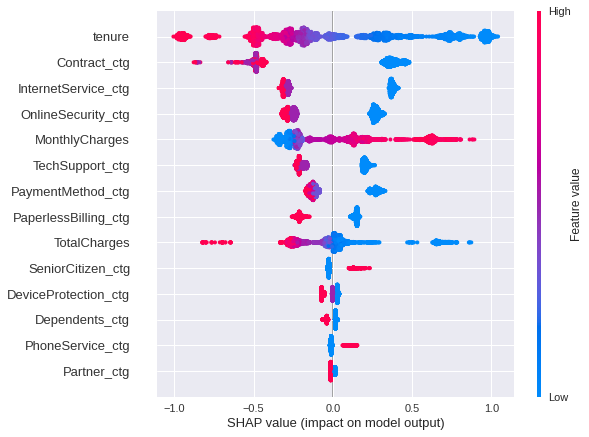

In [60]:
shap_values = cb_clf.get_feature_importance(Pool(X_train[features],y_train), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X_train[features])

In [65]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.08],
    'grow_policy': ['Depthwise','Lossguide'],
    'depth': [5,10,15,25],
    'min_data_in_leaf': [2,5,10,20],
    'iterations': [200,800,1000]
}
cb_clf_gs = CatBoostClassifier(task_type = 'GPU',
                            learning_rate=0.01,
                            devices = '0:1',
                            eval_metric='AUC',
                            custom_metric='Logloss',
                            iterations=5000,
                            depth=3,
                            random_seed = 1,
                            od_type='Iter',
                            od_wait=500
                            )

cb_clf_gs.grid_search(param_grid=param_grid, X=training_pool, plot=True, cv=5)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8589027	best: 0.8589027 (0)	total: 1.38s	remaining: 6m 34s
1:	loss: 0.8614446	best: 0.8614446 (1)	total: 2.69s	remaining: 6m 24s
2:	loss: 0.8590579	best: 0.8614446 (1)	total: 3.81s	remaining: 6m 1s
3:	loss: 0.8599562	best: 0.8614446 (1)	total: 7.53s	remaining: 8m 54s
4:	loss: 0.8614446	best: 0.8614446 (1)	total: 9.92s	remaining: 9m 21s
5:	loss: 0.8590579	best: 0.8614446 (1)	total: 13s	remaining: 10m 12s
6:	loss: 0.8599562	best: 0.8614446 (1)	total: 16.6s	remaining: 11m 7s
7:	loss: 0.8614446	best: 0.8614446 (1)	total: 19.3s	remaining: 11m 14s
8:	loss: 0.8590579	best: 0.8614446 (1)	total: 22s	remaining: 11m 21s
9:	loss: 0.8490784	best: 0.8614446 (1)	total: 25.4s	remaining: 11m 44s
10:	loss: 0.8464427	best: 0.8614446 (1)	total: 28.6s	remaining: 12m
11:	loss: 0.8472144	best: 0.8614446 (1)	total: 31.7s	remaining: 12m 9s
12:	loss: 0.8490784	best: 0.8614446 (1)	total: 40.5s	remaining: 14m 17s
13:	loss: 0.8464427	best: 0.8614446 (1)	total: 48.1s	remaining: 15m 41s
14:	loss: 0.847214

112:	loss: 0.8591702	best: 0.8614487 (28)	total: 11m 19s	remaining: 17m 31s
113:	loss: 0.8583719	best: 0.8614487 (28)	total: 11m 22s	remaining: 17m 22s
114:	loss: 0.8597766	best: 0.8614487 (28)	total: 11m 28s	remaining: 17m 15s
115:	loss: 0.8591702	best: 0.8614487 (28)	total: 11m 32s	remaining: 17m 6s
116:	loss: 0.8583719	best: 0.8614487 (28)	total: 11m 36s	remaining: 16m 57s
117:	loss: 0.8602155	best: 0.8614487 (28)	total: 11m 37s	remaining: 16m 45s
118:	loss: 0.8615773	best: 0.8615773 (118)	total: 11m 39s	remaining: 16m 33s
119:	loss: 0.8597806	best: 0.8615773 (118)	total: 11m 41s	remaining: 16m 21s
120:	loss: 0.8603768	best: 0.8615773 (118)	total: 11m 47s	remaining: 16m 16s
121:	loss: 0.8615773	best: 0.8615773 (118)	total: 11m 52s	remaining: 16m 8s
122:	loss: 0.8597806	best: 0.8615773 (118)	total: 11m 56s	remaining: 16m
123:	loss: 0.8603768	best: 0.8615773 (118)	total: 12m 2s	remaining: 15m 55s
124:	loss: 0.8615773	best: 0.8615773 (118)	total: 12m 6s	remaining: 15m 47s
125:	loss: 0.

220:	loss: 0.8599399	best: 0.8615773 (118)	total: 17m 58s	remaining: 5m 26s
221:	loss: 0.8592559	best: 0.8615773 (118)	total: 18m 2s	remaining: 5m 21s
222:	loss: 0.8599971	best: 0.8615773 (118)	total: 18m 7s	remaining: 5m 17s
223:	loss: 0.8599399	best: 0.8615773 (118)	total: 18m 11s	remaining: 5m 11s
224:	loss: 0.8592559	best: 0.8615773 (118)	total: 18m 14s	remaining: 5m 6s
225:	loss: 0.8603462	best: 0.8615773 (118)	total: 18m 16s	remaining: 5m
226:	loss: 0.8610444	best: 0.8615773 (118)	total: 18m 18s	remaining: 4m 55s
227:	loss: 0.8607402	best: 0.8615773 (118)	total: 18m 20s	remaining: 4m 49s
228:	loss: 0.8605034	best: 0.8615773 (118)	total: 18m 25s	remaining: 4m 44s
229:	loss: 0.8610444	best: 0.8615773 (118)	total: 18m 30s	remaining: 4m 40s
230:	loss: 0.8607402	best: 0.8615773 (118)	total: 18m 35s	remaining: 4m 35s
231:	loss: 0.8604952	best: 0.8615773 (118)	total: 18m 41s	remaining: 4m 30s
232:	loss: 0.8610444	best: 0.8615773 (118)	total: 18m 45s	remaining: 4m 25s
233:	loss: 0.860740

{'params': {'min_data_in_leaf': 2,
  'depth': 10,
  'iterations': 200,
  'learning_rate': 0.05,
  'grow_policy': 'Lossguide'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,


In [68]:
cb_clf_gs.compare(cb_clf, data=training_pool, metrics='AUC')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [69]:
pred = cb_clf_gs.predict(X_test[features])

In [71]:
roc_auc_score(y_test, pred,labels=1)

0.7056762714533144

In [72]:
pred2 = cb_clf.predict(X_test[features])
accuracy_score(y_test,pred2)

0.8090844570617459

We are going to take a look at the False Negatives and the False Positives. Okay a False Negative here would be a client that was predicted as No Churn when actually he Churn the service. And the False positive when the Prediction tell us that the client churn but actually he don't. 
My point of view here depends on the strategy that the company would like to apply. For example if we want to predict if a client is going to churn to try to keep the client offering some kind of promotion or disscount. We need to look to both rates, False Positives and False negatives because if we only focus on lower the False Positives and we don't lower the False negatives we will be spending money in an effort to keep clients when they don't even consider the churn, sure this could be also seen as an "inversion" for the loyality of the clients but we have to keep in minds this kind of strategies 

So after the last statement, we can see that Catboost is the one that performs better in both of this metrics followed by LightGBM and last one XGBoost

## Hyper Tuning Parameters

Okay now that we already test the models without even do a Grid Search or a Cross Validation we continue our comparisson by perfoming hyper tunning on each of the models to get the better score we can.

### Catboost HT

In [ ]:
import shap
shap.initjs()
shap.summary_plot(shap_values, splits['X_train'])

In [ ]:
features = [x for x in features if x not in ['StreamingTV_ctg','StreamingMovies_ctg','gender_ctg','MultipleLines_ctg','Device_Protection_ctg','OnlineBackup_ctg'] ]

In [ ]:
features

In [ ]:
cb_clf = CatBoostClassifier(task_type = 'GPU',
                            learning_rate=0.01,
                            devices = '0:1',
                            eval_metric='AUC',
                            custom_metric='Logloss',
                            iterations=5000,
                            depth=3,
                            random_seed = 1,
                            od_type='Iter',
                            od_wait=500
                            )
training_pool = Pool(splits['X_train'][features], splits['y_train'])

In [ ]:
cb_clf.fit(training_pool, eval_set=(splits['X_test'][features],splits['y_test']),plot=True)

In [ ]:
shap_values = cb_clf.get_feature_importance(training_pool, type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

In [ ]:
shap.summary_plot(shap_values, splits['X_train'][features])

In [ ]:
pred = cb_clf.predict(splits['X_test'][features])

We are going to use Catboost internal grid search so after fitting now we have to set our params to perform the GS

In [ ]:
param_grid = {
    'learning_rate': [0.02, 0.05, 0.08],
    'grow_policy': ['Depthwise'],
    'depth': [5,10,15,25],
    'random_seed': [10,40,60],
    'min_data_in_leaf': [2,5,10,20]
}

cb_clf_ht = CatBoostClassifier(task_type = 'GPU',
                            devices = '0:1',
                            eval_metric='Logloss',
                            custom_metric='AUC',
                            iterations=100,
                            )

cb_clf_ht.grid_search(param_grid=param_grid, X=training_pool, plot=True, cv=5)